Starting lookback window optimization...
Starting volatility prediction...


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Cross-validated on interval 3
Predicting interval 4...


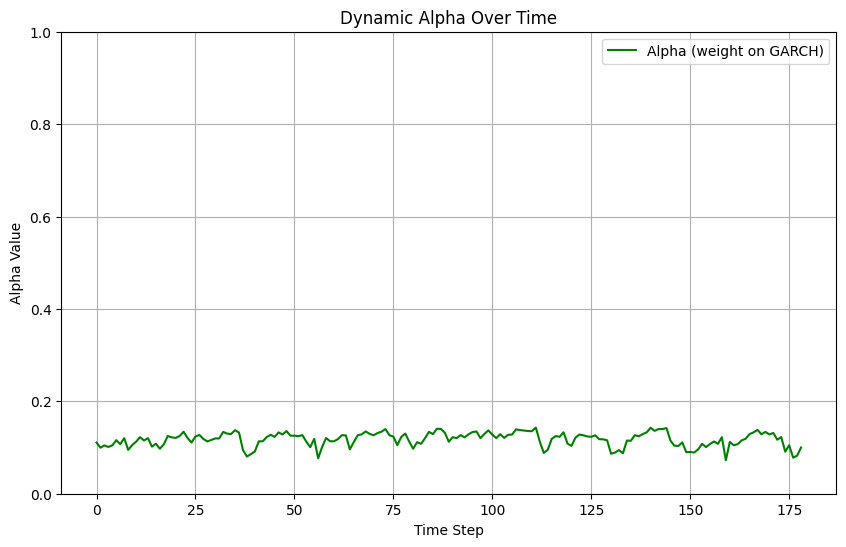

Cross-validated on interval 4
Predicting interval 5...


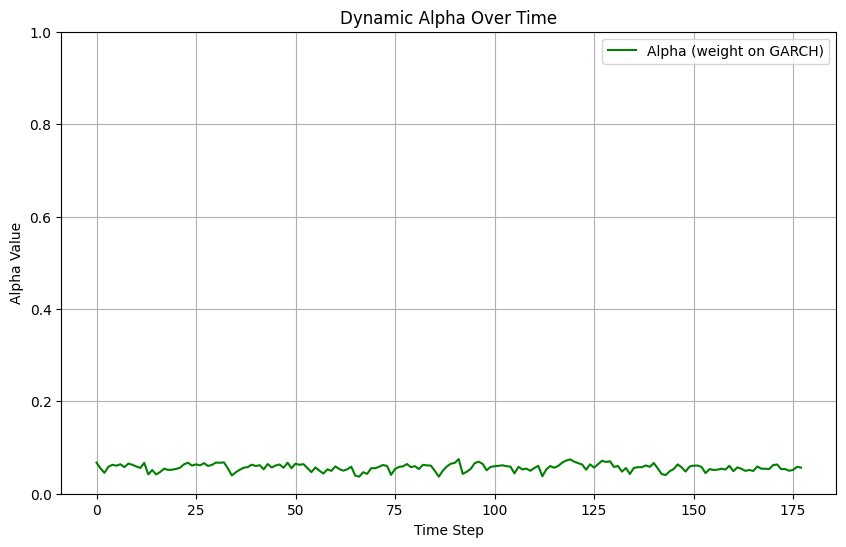

Cross-validated on interval 5
Predicting interval 6...


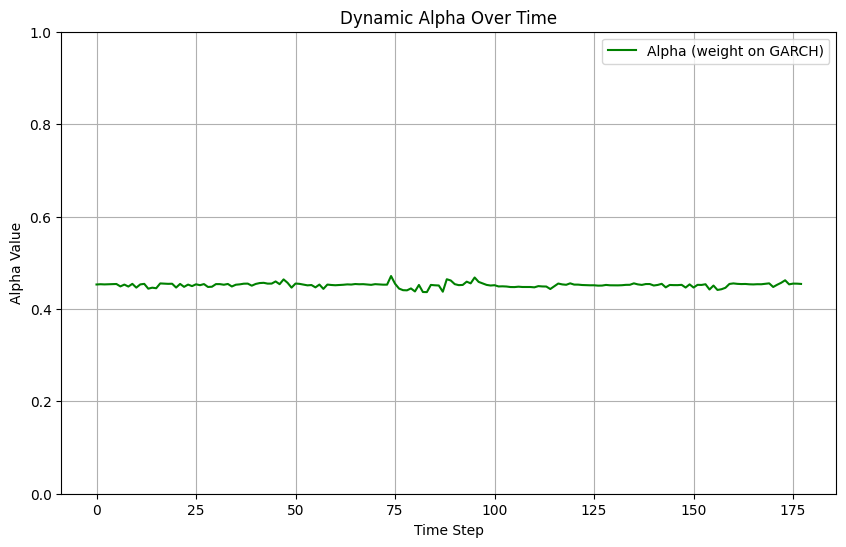

Cross-validated on interval 6
Predicting interval 7...


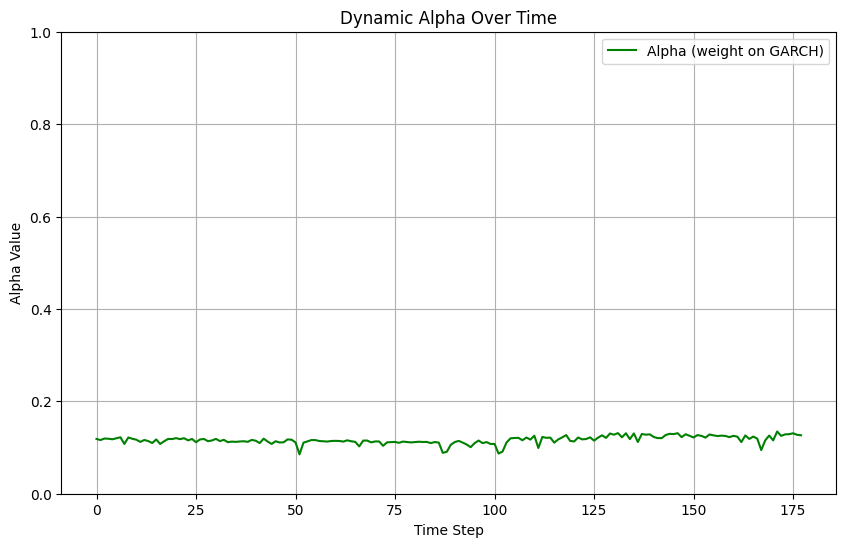

Cross-validated on interval 7
Predicting interval 8...


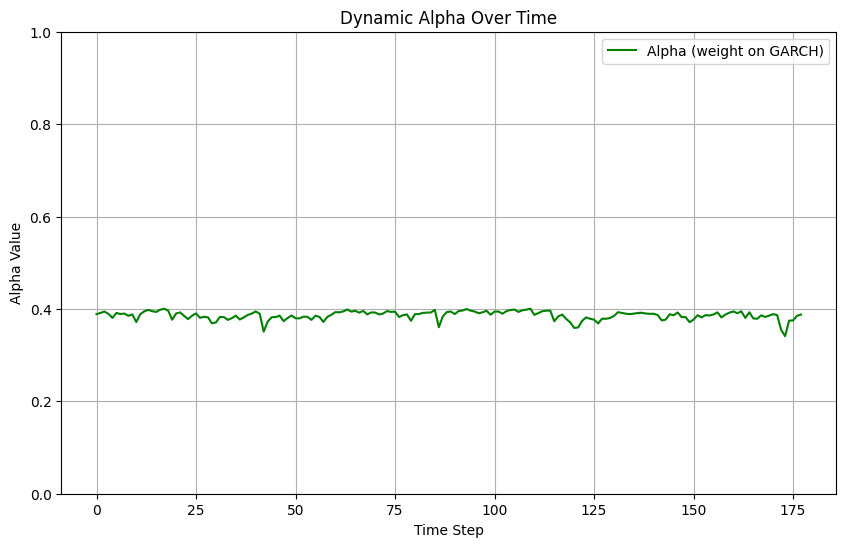

RMSE per interval: [np.float64(7.070741149385355), np.float64(8.669605294893088), np.float64(6.967999747222651), np.float64(8.814722957660807), np.float64(7.04851342077683)]
MAE per interval: [4.093811511993408, 6.610234260559082, 5.3862128257751465, 5.893721103668213, 5.916088104248047]


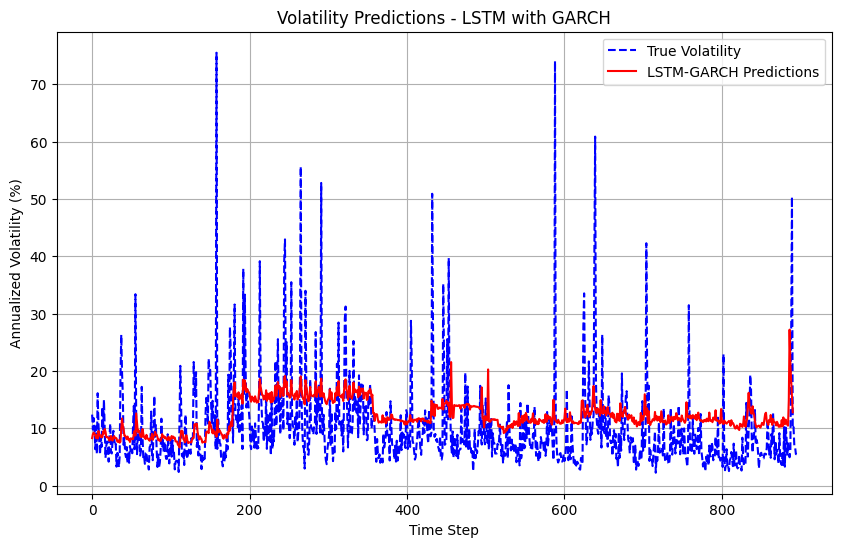

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch.nn.functional as F
import copy
from sklearn.model_selection import ParameterGrid
from arch import arch_model

from Models.LSTMxGARCH import *
from Model_eval.test_fct_lstm_garch import *


df = pd.read_csv('Data/hourly_data_ff.csv')
df_returns = pd.read_csv('Data/hourly_returns_data_ff.csv')


param_grid = {
    'hidden_size_1': [32,64,128,256],
    'hidden_size_2': [32,64,128,256],
    'learning_rate': [0.0005,0.001],
    'weight_decay': [0.0001,0.001],
    'dropout_rate': [0.2,0.4,0.6,0.8]
}

feature_cols = ['ask_depth', 'bid_depth', 'bid_volume', 'spread', 'volume_difference', 'vol']

final_pred, rmse_list, mae_list = test_lstm_garch(
    df_returns, df, DualLSTMModel_garch, feature_cols, param_grid
)